# AGE RECOGNITION

In [3]:
import numpy as np
import pandas as pd
import cv2
import os
import time
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,LeakyReLU
from keras.layers import Conv2D, MaxPooling2D,Activation,BatchNormalization
from keras import callbacks,regularizers
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.optimizers import RMSprop

C:\Users\Rahul\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [6]:
# This is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True)

In [7]:
img = cv2.imread('img.jpg')
print(img.shape)

(114, 74, 3)


In [8]:
train_generator = train_datagen.flow_from_directory(
        'C:\\Users\\Rahul\\Desktop\\gender and age detection from face\\age classification\\',  # this is the target directory
        target_size=(80, 80),batch_size = 32,seed=13,shuffle=True,color_mode='rgb',  # all images will be resized to 32*32
        class_mode='categorical',subset="training")  # since we use binary_crossentropy loss, we need binary labels

validation_generator = train_datagen.flow_from_directory(
        'C:\\Users\\Rahul\\Desktop\\gender and age detection from face\\age classification\\',  # this is the target directory
        target_size=(80, 80),batch_size = 32,seed=13,shuffle=True,color_mode='rgb',  # all images will be resized to 32*32
        class_mode='categorical',subset="validation")  # since we use binary_crossentropy loss, we need binary labels


Found 1098 images belonging to 5 classes.
Found 272 images belonging to 5 classes.


In [9]:
train_generator.classes

array([0, 0, 0, ..., 4, 4, 4])

In [10]:
train_generator.image_shape[0]

80

In [11]:
train_generator.batch_size

32

In [12]:
validation_generator.image_shape

(80, 80, 3)

In [13]:
len(train_generator)

35

In [14]:
from keras import backend as K

def l1_reg(weight_matrix):
    return 0.01 * K.sum(K.abs(weight_matrix))

In [15]:
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (80,80,3)))
model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation = "softmax"))


optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [16]:
model_name = "age"
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=1)
checkpoint_callback = ModelCheckpoint(model_name+'.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')


start_time = time.time()

hist = model.fit_generator(
        train_generator,
        steps_per_epoch=1098, # '//' in python returns only the quotient
        epochs=10,callbacks=[early_stopping_callback, checkpoint_callback],
        validation_data=validation_generator,validation_steps=272)
end_time = time.time()
print("Model built in: {} minutes.".format((end_time - start_time) / 60.))

Epoch 1/10
1098/1098 [==============================] - 661s 602ms/step - loss: 0.8635 - acc: 0.6611 - val_loss: 1.8139 - val_acc: 0.6012

Epoch 00001: val_loss improved from inf to 1.81393, saving model to age.h5
Epoch 2/10
1098/1098 [==============================] - 650s 592ms/step - loss: 0.2230 - acc: 0.9250 - val_loss: 1.8287 - val_acc: 0.6401

Epoch 00002: val_loss did not improve from 1.81393
Model built in: 21.950625121593475 minutes.


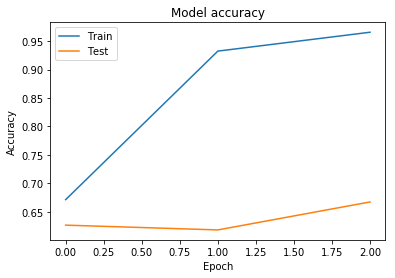

In [56]:
# Plot training & validation accuracy values
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy for age estimation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

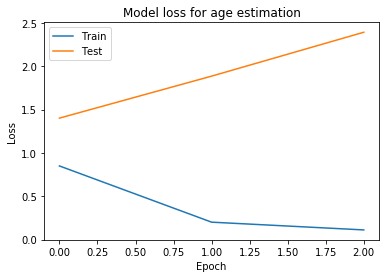

In [58]:
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss for age estimation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
age_list=['0-10','11-21','22-34','35-69','70-100']

In [18]:
age_list[1]

'11-21'

In [21]:
input_img=cv2.imread('img3.jpg')
input_img_resize=cv2.resize(input_img,(80, 80))
#test_image = input_img.img_to_array(test_image)
test_image = np.expand_dims(input_img_resize,axis = 0)
a = model.predict_classes(test_image)
x = age_list[model.predict(test_image)[0].argmax()]
print(x)
print(a)

70-100
[4]


# GENDER RECOGNITION

In [22]:
# This is the augmentation configuration we will use for training
train_datagen_gender = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True)

In [23]:
train_generator_gender = train_datagen_gender.flow_from_directory(
        'C:\\Users\\Rahul\\Desktop\\gender and age detection from face\\gender classification\\',  # this is the target directory
        target_size=(80, 80),batch_size = 32,seed=13,shuffle=True,color_mode='rgb',  # all images will be resized to 32*32
        class_mode='categorical',subset="training")  # since we use binary_crossentropy loss, we need binary labels

validation_generator_gender = train_datagen_gender.flow_from_directory(
        'C:\\Users\\Rahul\\Desktop\\gender and age detection from face\\gender classification\\',  # this is the target directory
        target_size=(80, 80),batch_size = 32,seed=13,shuffle=True,color_mode='rgb',  # all images will be resized to 32*32
        class_mode='categorical',subset="validation")  # since we use binary_crossentropy loss, we need binary labels


Found 476 images belonging to 2 classes.
Found 119 images belonging to 2 classes.


In [24]:
model1 = Sequential()

model1.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (80,80,3)))
model1.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))


model1.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model1.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))


model1.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model1.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(256, activation = "relu"))
model1.add(Dropout(0.5))
model1.add(Dense(2, activation = "softmax"))


optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model1.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [25]:
model_name1 = "gender"
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=1)
checkpoint_callback = ModelCheckpoint(model_name1+'.h5', monitor='val_loss', verbose=2, save_best_only=True, mode='min')


start_time = time.time()

hist1 = model1.fit_generator(
        train_generator_gender,
        steps_per_epoch=476, # '//' in python returns only the quotient
        epochs=5,callbacks=[early_stopping_callback, checkpoint_callback],
        validation_data=validation_generator_gender,validation_steps=119)
end_time = time.time()
print("Model built in: {} minutes.".format((end_time - start_time) / 60.))

Epoch 1/5
476/476 [==============================] - 291s 611ms/step - loss: 0.4952 - acc: 0.7505 - val_loss: 0.6331 - val_acc: 0.7220

Epoch 00001: val_loss improved from inf to 0.63307, saving model to gender.h5
Epoch 2/5
476/476 [==============================] - 290s 608ms/step - loss: 0.1989 - acc: 0.9179 - val_loss: 0.8585 - val_acc: 0.7044

Epoch 00002: val_loss did not improve from 0.63307
Model built in: 9.775767425696055 minutes.


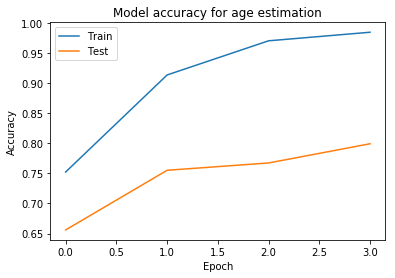

In [74]:
# Plot training & validation accuracy values
plt.plot(hist1.history['acc'])
plt.plot(hist1.history['val_acc'])
plt.title('Model accuracy for age estimation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

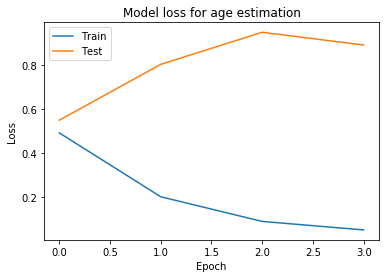

In [75]:
# Plot training & validation loss values
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('Model loss for age estimation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [26]:
gender_list = ["female","male"]

In [27]:
input_img1=cv2.imread('img3.jpg')
input_img_resize1=cv2.resize(input_img1,(80, 80))
#test_image = input_img.img_to_array(test_image)
test_image1 = np.expand_dims(input_img_resize1,axis = 0)
a = model1.predict_classes(test_image1)
x = gender_list[model1.predict(test_image1)[0].argmax()]
print(x)
print(a)


male
[1]


In [28]:
image=cv2.imread('img3.jpg')

# FACE DETECTION USING HAAR CASCADE CLASSIFIER

In [31]:
import imutils

In [48]:
face_cascade = cv2.CascadeClassifier('C:\\Users\\Rahul\\Desktop\\gender and age detection from face\\haarcascade_frontalface.xml')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 5)
print("Found "+str(len(faces))+" face(s)")

Found 1 face(s)


In [49]:
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [50]:
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,255,0),2)
    face_img = image[y:y+h, x:x+w].copy()
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    
    

In [51]:
plt.imshow(convertToRGB(image))

In [52]:
blob = cv2.dnn.blobFromImage(face_img, 1, (80, 80), swapRB=True,)

In [53]:
# Predict gender 
    #gender_preds = hist1.forward()
blob1 = np.transpose(blob, (0,3,2,1))
gender = gender_list[model1.predict(blob1)[0].argmax()]


In [54]:
    # Predict age
    #hist.setInput(blob)
    #age_preds = hist.forward()
age = age_list[model.predict(blob1)[0].argmax()]
overlay_text = "%s, %s" % (gender, age)


In [60]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image, overlay_text ,(x,y), font, 2,(255,255,255),2,cv2.LINE_AA)
cv2.imshow("image", image)